This notebook contains code used to generate size plots. Plots do not look exactly like the ones presented in the paper (additional graphical processing was performed in Adobe Illustartor) but come fairly close. We include several additional plots, which did not make it to the final manuscript (due to space constraints). **Related to figures: 3 and S3**

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2)

In [9]:
%%R
meiotic<-read.csv('../Data/meiotic_true.csv',stringsAsFactors=FALSE)
mitotic<-read.csv('../Data/meiotic_false.csv',stringsAsFactors=FALSE)
original<-read.csv('../Data/original.csv',stringsAsFactors=FALSE)
meiotic_for_plot<-meiotic[(which(meiotic$stage=='mI' | meiotic$stage=='mII' | meiotic$stage=='m')),]

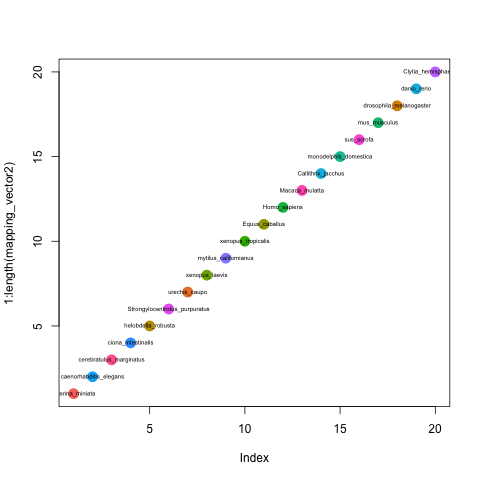

In [8]:
%%R
new_cols<-c("#F8766D","#00B0F6","#FF6A98","#35A2FF","#C09B00","#E76BF3","#EA8331","#7CAE00","#9590FF","#39B600","#A3A500","#00BB4E","#FF62BC","#00BAE0","#00C1A3","#FA62DB","#00BF7D","#D89000","#00BAE0","#C77CFF")
mapping_vector2<-setNames(object=as.character(new_cols),nm=unique(original$organism))

plot(1:length(mapping_vector2), pch=16, cex=2, col=mapping_vector2)
text(1:length(mapping_vector2),names(mapping_vector2),cex=0.5) 

###I. Scaling plots for meiotic spindles (by organism)

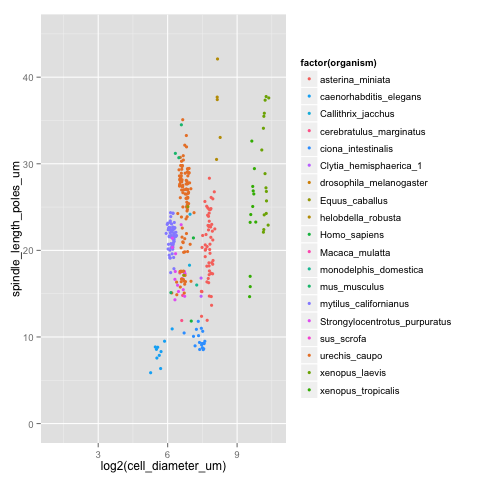

In [14]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B

To overlay mean values:

In [16]:
%%R
means_F3B<-cbind(by(meiotic_for_plot[,c(3)], meiotic_for_plot$organism,mean,na.rm=TRUE),by(meiotic_for_plot[,c(36)], meiotic_for_plot$organism,mean,na.rm=TRUE))
means_F3B<-data.frame(means_F3B)
names(means_F3B)<-c("cell_diameter_um",'spindle_length_poles_um')
means_F3B$organism<-row.names(means_F3B)

Below are meiotic spindle size plots with a variety of esthetics.

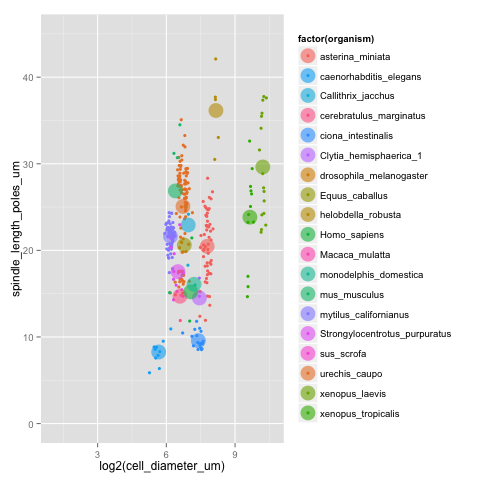

In [18]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=7,alpha=0.6)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B

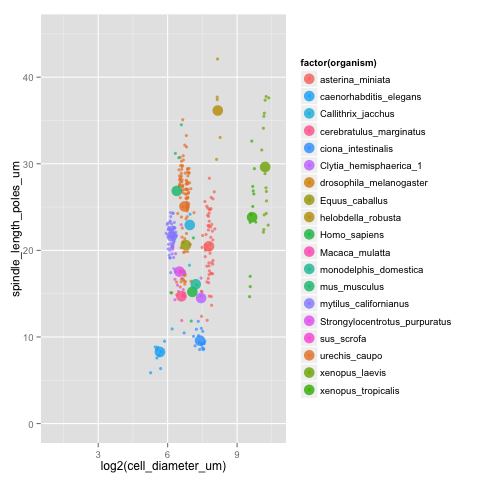

In [19]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5,alpha=0.7)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=5,alpha=0.8)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B

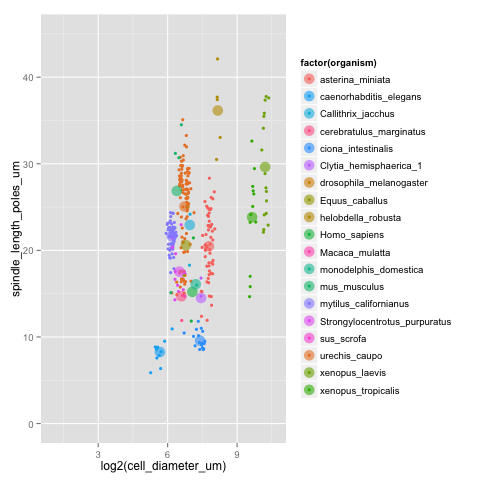

In [20]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=5,alpha=0.6)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B

Testing a simple linear model.

In [22]:
%%R
print(deviance(lm(meiotic_for_plot$spindle_length_poles_um~1)))
print(deviance(lm(meiotic_for_plot$spindle_length_poles_um~meiotic_for_plot$cell_diameter_um)))
print(summary(lm(meiotic_for_plot$spindle_length_poles_um~meiotic_for_plot$cell_diameter_um)))

[1] 15216.72
[1] 12123.58

Call:
lm(formula = meiotic_for_plot$spindle_length_poles_um ~ meiotic_for_plot$cell_diameter_um)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8892  -4.0354   0.4849   4.0847  19.6962 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       20.501764   0.443055  46.274  < 2e-16 ***
meiotic_for_plot$cell_diameter_um  0.006686   0.001308   5.112 5.56e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.234 on 312 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.07729,	Adjusted R-squared:  0.07434 
F-statistic: 26.14 on 1 and 312 DF,  p-value: 5.561e-07



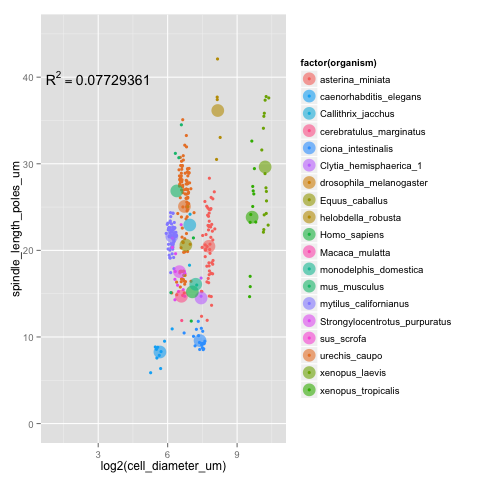

In [23]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=6,alpha=0.6)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B<-plot_F3B+annotate('text',label=paste("R^2==",(summary.lm(lm(meiotic_for_plot$spindle_length_poles_um~meiotic_for_plot$cell_diameter_um))$r.squared)),x=3,y=40,parse=TRUE)
plot_F3B

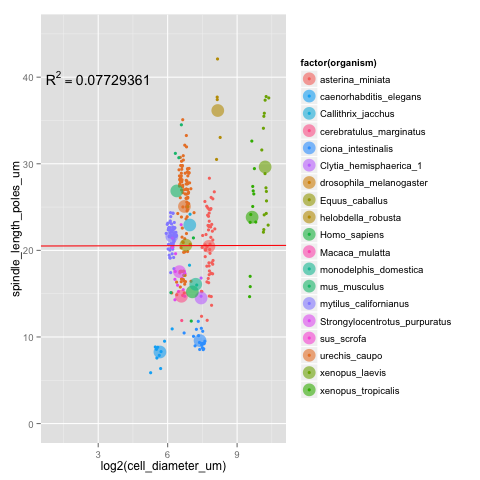

In [24]:
%%R
plot_F3B+geom_abline(intercept=20.501764,slope=0.006686,colour='red')

In [25]:
%%R
print(summary(lm(meiotic_for_plot$spindle_length_poles_um~log2(meiotic_for_plot$cell_diameter_um))))
print(deviance(lm(meiotic_for_plot$spindle_length_poles_um~log2(meiotic_for_plot$cell_diameter_um))) )


Call:
lm(formula = meiotic_for_plot$spindle_length_poles_um ~ log2(meiotic_for_plot$cell_diameter_um))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9741  -4.2186   0.6221   3.9060  18.6720 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              11.3337     2.3439   4.835 2.09e-06
log2(meiotic_for_plot$cell_diameter_um)   1.4835     0.3259   4.551 7.65e-06
                                           
(Intercept)                             ***
log2(meiotic_for_plot$cell_diameter_um) ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.284 on 312 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.06226,	Adjusted R-squared:  0.05926 
F-statistic: 20.72 on 1 and 312 DF,  p-value: 7.646e-06

[1] 12321.1


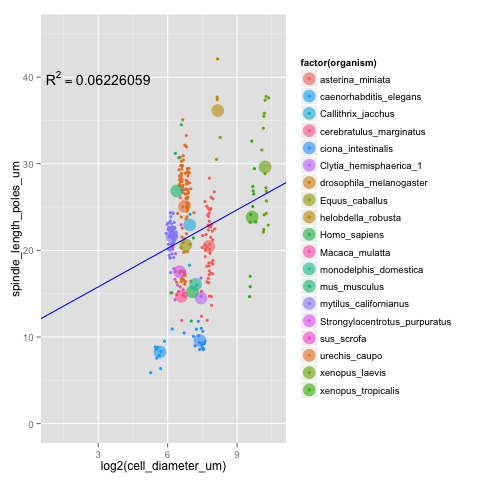

In [27]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=6,alpha=0.6)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B<-plot_F3B+annotate('text',label=paste("R^2==",(summary.lm(lm(meiotic_for_plot$spindle_length_poles_um~log2(meiotic_for_plot$cell_diameter_um)))$r.squared)),x=3,y=40,parse=TRUE)
plot_F3B
plot_F3B+geom_abline(intercept=11.334,slope=1.484,colour='blue')


Regressing through means.

In [28]:
%%R
print(summary.lm(lm(means_F3B$spindle_length_poles_um~means_F3B$cell_diameter_um))$r.squared)
print(summary.lm(lm(means_F3B$spindle_length_poles_um~log2(means_F3B$cell_diameter_um)))$r.squared )

[1] 0.1945252
[1] 0.2321305


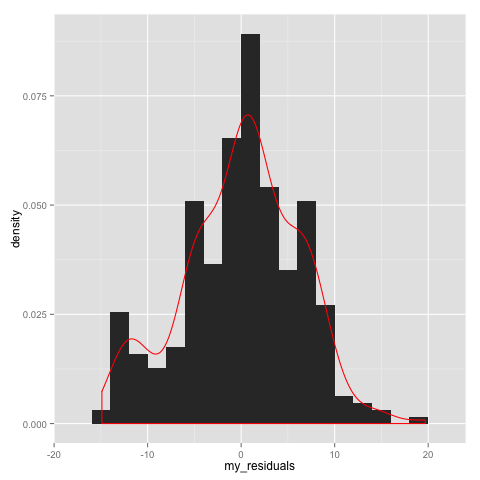

In [32]:
%%R
my_residuals=lm(meiotic_for_plot$spindle_length_poles_um~meiotic_for_plot$cell_diameter_um)$residuals
ggplot()+geom_histogram(aes(my_residuals),binwidth=2)
ggplot()+geom_histogram(aes(x=my_residuals,y=..density..),binwidth=2)+geom_density(aes(x=my_residuals),colour='red')

In [33]:
%%R
shapiro.test(my_residuals)


	Shapiro-Wilk normality test

data:  my_residuals
W = 0.9847, p-value = 0.002001



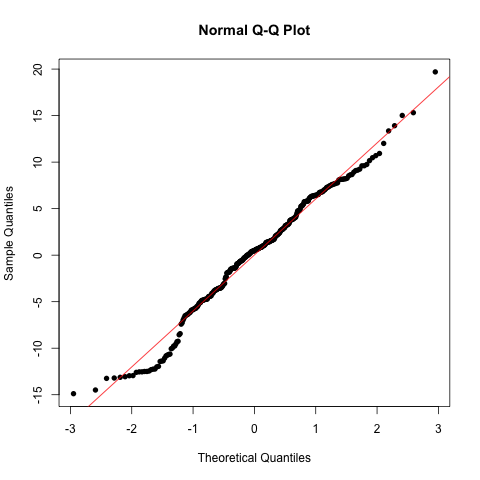

In [34]:
%%R
qqnorm(my_residuals,pch=16)
qqline(my_residuals,col='red')


	Shapiro-Wilk normality test

data:  my_residuals_log
W = 0.9842, p-value = 0.001581



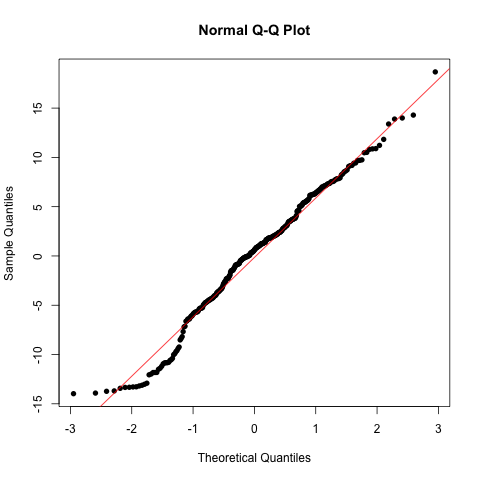

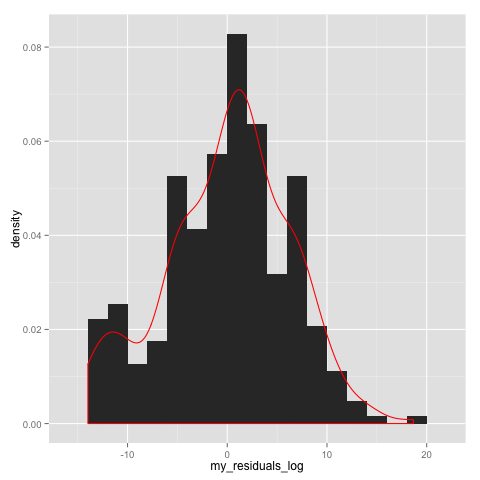

In [35]:
%%R
my_residuals_log=lm(meiotic_for_plot$spindle_length_poles_um~log2(meiotic_for_plot$cell_diameter_um))$residuals
print(shapiro.test(my_residuals_log))
qqnorm(my_residuals_log,pch=16)
qqline(my_residuals_log,col='red')
ggplot()+geom_histogram(aes(x=my_residuals_log,y=..density..),binwidth=2)+geom_density(aes(x=my_residuals_log),colour='red')

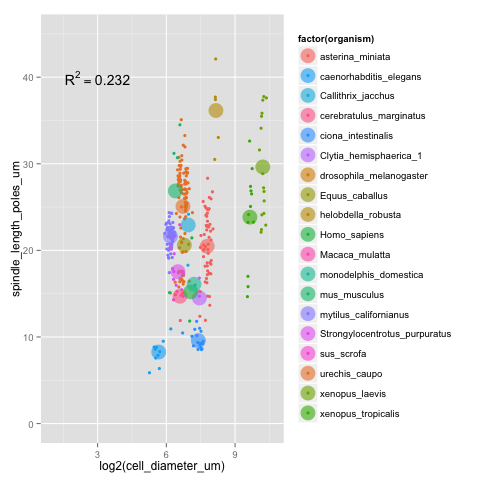

In [37]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=7,alpha=0.6)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B<-plot_F3B+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3B$spindle_length_poles_um~log2(means_F3B$cell_diameter_um)))$r.squared,3))),x=3,y=40,parse=TRUE)
plot_F3B

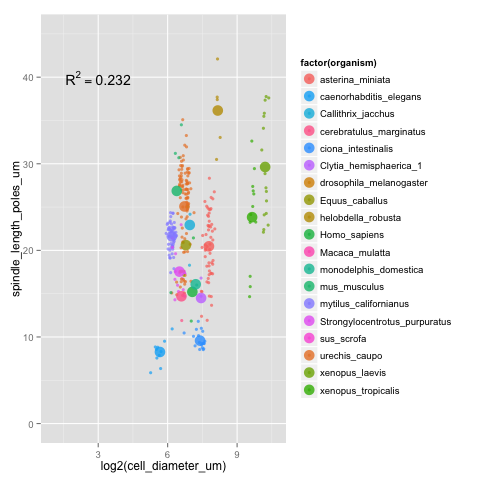

In [38]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5,alpha=0.7)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=5,alpha=0.8)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B<-plot_F3B+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3B$spindle_length_poles_um~log2(means_F3B$cell_diameter_um)))$r.squared,3))),x=3,y=40,parse=TRUE)
plot_F3B

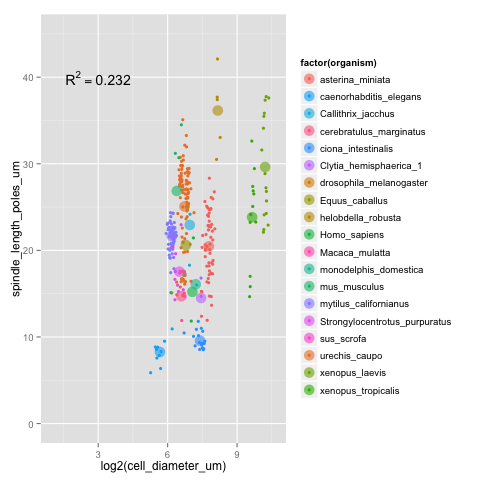

In [39]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=5,alpha=0.6)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B<-plot_F3B+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3B$spindle_length_poles_um~log2(means_F3B$cell_diameter_um)))$r.squared,3))),x=3,y=40,parse=TRUE)
plot_F3B

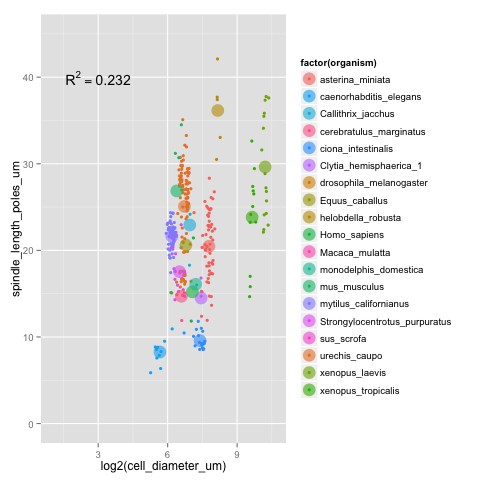

In [40]:
%%R
plot_F3B<-ggplot()
plot_F3B<-plot_F3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3B<-plot_F3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_F3B<-plot_F3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3B))),size=6,alpha=0.6)
plot_F3B<-plot_F3B+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3B<-plot_F3B+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3B$spindle_length_poles_um~log2(means_F3B$cell_diameter_um)))$r.squared,3))),x=3,y=40,parse=TRUE)
plot_F3B

###II. Scaling plots for mitotic spindles (by organism)

Spindles are additionally filtered by the cell number (early embryos only).

In [44]:
%%R
mitotic_for_plot<-mitotic[(which(mitotic$stage=='mI' | mitotic$stage=='mII' | mitotic$stage=='m')),]

print(unique(mitotic[(which(mitotic$stage=='mI' | mitotic$stage=='mII' | mitotic$stage=='m')),]$stage))
print(unique(mitotic_for_plot$num_of_cells_NUM))


[1] "m"
 [1]   1   2   4   8  16  26  12  64 128  32  48  96  28  NA


In [45]:
%%R
mitotic_for_plot<-mitotic_for_plot[which(mitotic_for_plot$num_of_cells_NUM==1 | mitotic_for_plot$num_of_cells_NUM==2 | mitotic_for_plot$num_of_cells_NUM==4),]
means_F3C<-cbind(by(mitotic_for_plot$cell_diameter_um, mitotic_for_plot$organism,mean,na.rm=TRUE),by(mitotic_for_plot$spindle_length_poles_um, mitotic_for_plot$organism,mean,na.rm=TRUE))
means_F3C<-data.frame(means_F3C)
names(means_F3C)<-c("cell_diameter_um",'spindle_length_poles_um')
means_F3C$organism<-row.names(means_F3C)

In [46]:
%%R
create_means_DF<-function(data_frame=NULL,columns_vector){
  list_of_cols=vector('list',length = length(columns_vector))
  for (i in 1:length(columns_vector)){
    list_of_cols[[i]]<-by(data_frame[,grep(columns_vector[i],names(data_frame))], data_frame$organism,mean,na.rm=TRUE)
  }
  means_df<-data.frame(do.call(cbind,list_of_cols))
  names(means_df)<-columns_vector
  return(means_df)
}

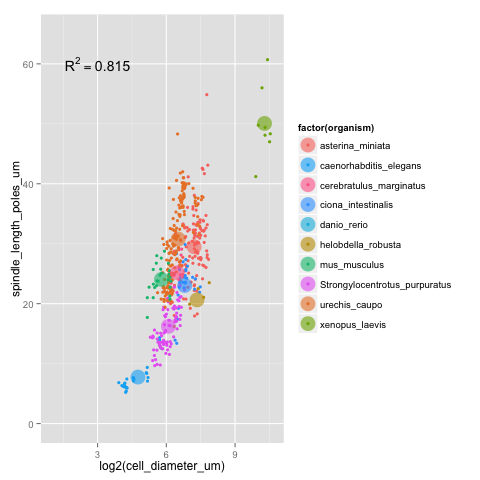

In [49]:
%%R
plot_F3C<-ggplot()
plot_F3C<-plot_F3C+geom_point(data=mitotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3C<-plot_F3C+xlim(c(1,log2(1600)))+ylim(c(0,65))
plot_F3C<-plot_F3C+geom_point(data=means_F3C,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3C))),size=7,alpha=0.6)
plot_F3C<-plot_F3C+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3C<-plot_F3C+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3C$spindle_length_poles_um~log10(means_F3C$cell_diameter_um)))$r.squared,3))),x=3,y=60,parse=TRUE)
plot_F3C

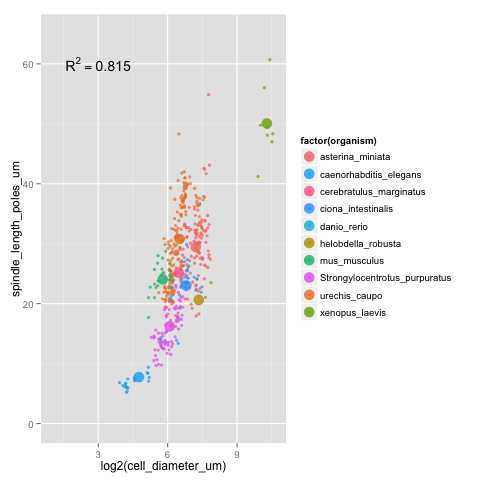

In [50]:
%%R
plot_F3C<-ggplot()
plot_F3C<-plot_F3C+geom_point(data=mitotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5,alpha=0.7)
plot_F3C<-plot_F3C+ylim(c(0,65))+xlim(c(1,log2(1600)))
plot_F3C<-plot_F3C+geom_point(data=means_F3C,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3C))),size=5,alpha=0.8)
plot_F3C<-plot_F3C+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3C<-plot_F3C+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3C$spindle_length_poles_um~log10(means_F3C$cell_diameter_um)))$r.squared,3))),x=3,y=60,parse=TRUE)
plot_F3C

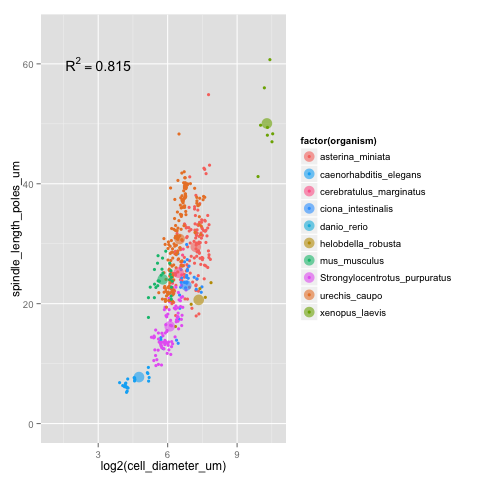

In [51]:
%%R
plot_F3C<-ggplot()
plot_F3C<-plot_F3C+geom_point(data=mitotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3C<-plot_F3C+ylim(c(0,65))+xlim(c(1,log2(1600)))
plot_F3C<-plot_F3C+geom_point(data=means_F3C,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3C))),size=5,alpha=0.6)
plot_F3C<-plot_F3C+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3C<-plot_F3C+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3C$spindle_length_poles_um~log10(means_F3C$cell_diameter_um)))$r.squared,3))),x=3,y=60,parse=TRUE)
plot_F3C

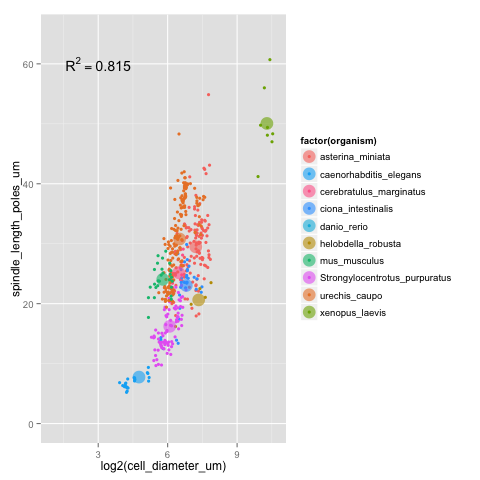

In [52]:
%%R
plot_F3C<-ggplot()
plot_F3C<-plot_F3C+geom_point(data=mitotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_F3C<-plot_F3C+ylim(c(0,65))+xlim(c(1,log2(1600)))
plot_F3C<-plot_F3C+geom_point(data=means_F3C,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(row.names(means_F3C))),size=6,alpha=0.6)
plot_F3C<-plot_F3C+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_F3C<-plot_F3C+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3C$spindle_length_poles_um~log10(means_F3C$cell_diameter_um)))$r.squared,3))),x=3,y=60,parse=TRUE)
plot_F3C

In [53]:
%%R
print(summary.lm(lm(mitotic_for_plot$spindle_length_poles_um~mitotic_for_plot$cell_diameter_um))$r.squared)
print(summary.lm(lm(mitotic_for_plot$spindle_length_poles_um~log2(mitotic_for_plot$cell_diameter_um)))$r.squared)
print(summary.lm(lm(means_F3C$spindle_length_poles_um~means_F3C$cell_diameter_um))$r.squared)
print(summary.lm(lm(means_F3C$spindle_length_poles_um~log2(means_F3C$cell_diameter_um)))$r.squared)
print(summary.lm(lm(means_F3C$spindle_length_poles_um~log10(means_F3C$cell_diameter_um)))$r.squared)

[1] 0.2418697
[1] 0.5215238
[1] 0.693882
[1] 0.814689
[1] 0.814689


###III. Size plots for meiotic spindles: aster-to-aster

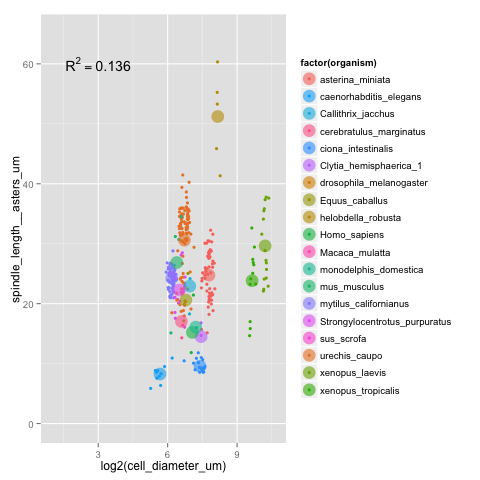

In [54]:
%%R
S3A_means<-create_means_DF(meiotic_for_plot,c("cell_diameter_um","spindle_length__asters_um"))

plot_S3A<-ggplot()
plot_S3A<-plot_S3A+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length__asters_um,colour=factor(organism)),size=1.5)
plot_S3A<-plot_S3A+ylim(c(0,65))+xlim(c(1,log2(1600)))
plot_S3A<-plot_S3A+geom_point(data=S3A_means,aes(x=log2(cell_diameter_um),y=spindle_length__asters_um,colour=factor(row.names(S3A_means))),size=6,alpha=0.6)
plot_S3A<-plot_S3A+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_S3A<-plot_S3A+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(S3A_means$spindle_length__asters_um~log2(S3A_means$cell_diameter_um)))$r.squared,3))),x=3,y=60,parse=TRUE)
plot_S3A

###IV.  Meiotic astral and anastral spindles

In [55]:
%%R
vec_names<-names(means_F3B)
vec_names[3]<-'organism'
names(means_F3B)<-vec_names
centrosome_lst<-vector('list',length(row.names(means_F3B)))
for(i in 1:length(row.names(means_F3B))){
  print(row.names(means_F3B)[i])
  print(meiotic_for_plot[which(meiotic_for_plot$organism==row.names(means_F3B)[i]),]$centrosome)
  centrosome_lst[[i]]<-unique(meiotic_for_plot[which(meiotic_for_plot$organism==row.names(means_F3B)[i]),]$centrosome)
}

centrosome <- do.call("rbind",centrosome_lst)
means_F3B = cbind(means_F3B,data.frame(centrosome = centrosome))


[1] "asterina_miniata"
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1] "caenorhabditis_elegans"
 [1] 0 0 0 0 0 0 0 0 0 0
[1] "Callithrix_jacchus"
[1] 0 0 0
[1] "cerebratulus_marginatus"
[1] 1 1 1
[1] "ciona_intestinalis"
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1] "Clytia_hemisphaerica_1"
[1] 0 0 0 0
[1] "drosophila_melanogaster"
[1] 0 0 0 0 0 0
[1] "Equus_caballus"
[1] 0 0 0 0 0 0
[1] "helobdella_robusta"
[1] 1 1 1 1 1
[1] "Homo_sapiens"
[1] 0 0 0 0 0 0 0 0
[1] "Macaca_mulatta"
[1] 0 0
[1] "monodelphis_domestica"
[1] 0 0 0
[1] "mus_musculus"
 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0
[1] "mytilus_californianus"
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1] "Strongylocentrotus_purpuratus"
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1] "sus_scrofa"
[1] 0 0 0 0
[1] "urechis_caupo"
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

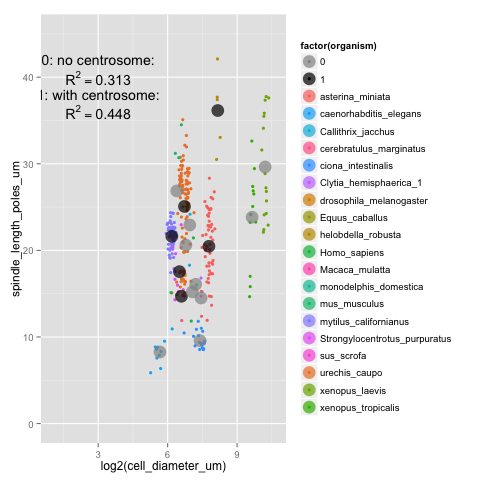

In [62]:
%%R
my_labels=unique(original$organism)
my_labels2<-c(my_labels,"0","1")
new_cols2<-c("#F8766D","#00B0F6","#FF6A98","#35A2FF","#C09B00","#E76BF3","#EA8331","#7CAE00","#9590FF","#39B600","#A3A500","#00BB4E","#FF62BC","#00BAE0","#00C1A3","#FA62DB","#00BF7D","#D89000","#00BAE0","#C77CFF",'#949494','#000000')
mapping_vector3<-setNames(object=as.character(new_cols2),my_labels2)
plot_S3B<-ggplot()
plot_S3B<-plot_S3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_S3B<-plot_S3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_S3B
plot_S3B<-plot_S3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(centrosome)),size=6,alpha=0.7) 
plot_S3B
plot_S3B<-plot_S3B+scale_color_manual(values =mapping_vector3)
plot_S3B
plot_S3B<-plot_S3B+annotate('text',label='0: no centrosome:',x=3,y=42)
plot_S3B
plot_S3B<-plot_S3B+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3B[means_F3B$centrosome=='0',]$spindle_length_poles_um~log2(means_F3B[means_F3B$centrosome=='0',]$cell_diameter_um)))$r.squared,3))),x=3,y=40,parse=TRUE)
plot_S3B
plot_S3B<-plot_S3B+annotate('text',label='1: with centrosome:',x=3,y=38)
plot_S3B<-plot_S3B+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3B[means_F3B$centrosome=='1',]$spindle_length_poles_um~log2(means_F3B[means_F3B$centrosome=='1',]$cell_diameter_um)))$r.squared,3))),x=3,y=36,parse=TRUE)
plot_S3B

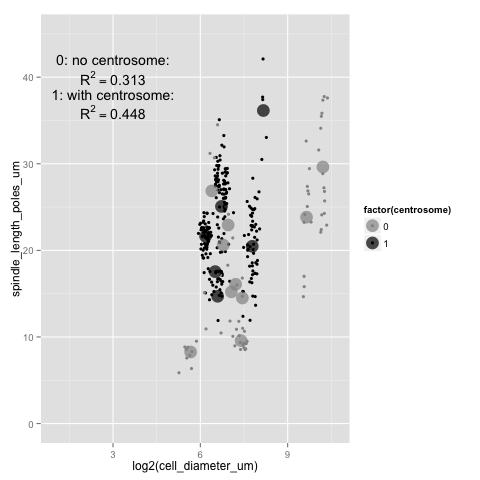

In [63]:
%%R
plot_S3B<-ggplot()
plot_S3B<-plot_S3B+geom_point(data=meiotic_for_plot,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(centrosome)),size=1.5)
plot_S3B<-plot_S3B+ylim(c(0,45))+xlim(c(1,log2(1600)))
plot_S3B
plot_S3B<-plot_S3B+geom_point(data=means_F3B,aes(x=log2(cell_diameter_um),y=spindle_length_poles_um,colour=factor(centrosome)),size=6,alpha=0.7) 
plot_S3B
plot_S3B<-plot_S3B+scale_color_manual(values =mapping_vector3)#,labels=names(mapping_vector3))
plot_S3B
plot_S3B<-plot_S3B+annotate('text',label='0: no centrosome:',x=3,y=42)
plot_S3B
plot_S3B<-plot_S3B+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3B[means_F3B$centrosome=='0',]$spindle_length_poles_um~log2(means_F3B[means_F3B$centrosome=='0',]$cell_diameter_um)))$r.squared,3))),x=3,y=40,parse=TRUE)
plot_S3B
plot_S3B<-plot_S3B+annotate('text',label='1: with centrosome:',x=3,y=38)
plot_S3B<-plot_S3B+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(means_F3B[means_F3B$centrosome=='1',]$spindle_length_poles_um~log2(means_F3B[means_F3B$centrosome=='1',]$cell_diameter_um)))$r.squared,3))),x=3,y=36,parse=TRUE)
plot_S3B

In [64]:
%%R
print(summary.lm(lm(means_F3B[means_F3B$centrosome=='0',]$spindle_length_poles_um~log2(means_F3B[means_F3B$centrosome=='0',]$cell_diameter_um)))$r.squared)
print(summary.lm(lm(means_F3B[means_F3B$centrosome=='1',]$spindle_length_poles_um~log2(means_F3B[means_F3B$centrosome=='1',]$cell_diameter_um)))$r.squared )
print(summary.lm(lm(meiotic_for_plot[meiotic_for_plot$centrosome=='0',]$spindle_length_poles_um~log2(meiotic_for_plot[meiotic_for_plot$centrosome=='0',]$cell_diameter_um)))$r.squared)
print(summary.lm(lm(meiotic_for_plot[meiotic_for_plot$centrosome=='1',]$spindle_length_poles_um~log2(meiotic_for_plot[meiotic_for_plot$centrosome=='1',]$cell_diameter_um)))$r.squared)

[1] 0.3128755
[1] 0.4484899
[1] 0.4966456
[1] 0.002705339


###V.  Meiotic spindle size vs polar body diameter

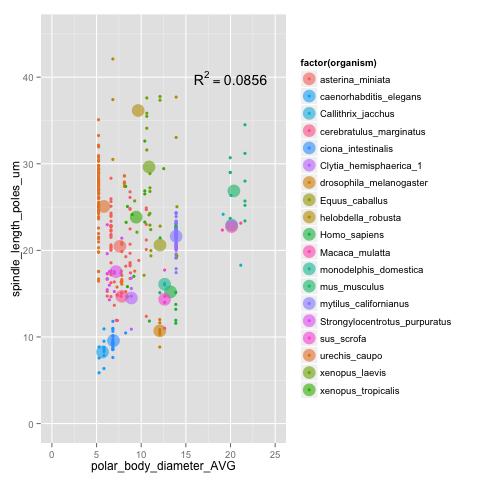

In [65]:
%%R
meiotic_for_plot$spindle_length_poles_um
meiotic_for_plot$polar_body_diameter_1_um
meiotic_for_plot$polar_body_diameter_2_um
grep('polar_body_diameter_1_um',names(meiotic_for_plot))
grep('polar_body_diameter_2_um',names(meiotic_for_plot))
meiotic_for_plot$polar_body_diameter_AVG=apply(meiotic_for_plot[,c(31,32)],1,mean,na.rm=TRUE)
S3C_means<-create_means_DF(meiotic_for_plot,c("polar_body_diameter_AVG","spindle_length_poles_um"))

plot_S3C<-ggplot()
plot_S3C<-plot_S3C+geom_point(data=meiotic_for_plot,aes(x=polar_body_diameter_AVG,y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_S3C
plot_S3C<-plot_S3C+ylim(c(0,45))+xlim(c(0,25))
plot_S3C
plot_S3C<-plot_S3C+geom_point(data=S3C_means,aes(x=polar_body_diameter_AVG,y=spindle_length_poles_um,colour=factor(row.names(S3C_means))),size=6,alpha=0.6)
plot_S3C<-plot_S3C+scale_color_manual(values = mapping_vector2)
plot_S3C
plot_S3C<-plot_S3C+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(S3C_means$spindle_length_poles_um~S3C_means$polar_body_diameter_AVG))$r.squared,3))),x=20,y=40,parse=TRUE)
plot_S3C

###VI. Meiotic spindle size vs genome size

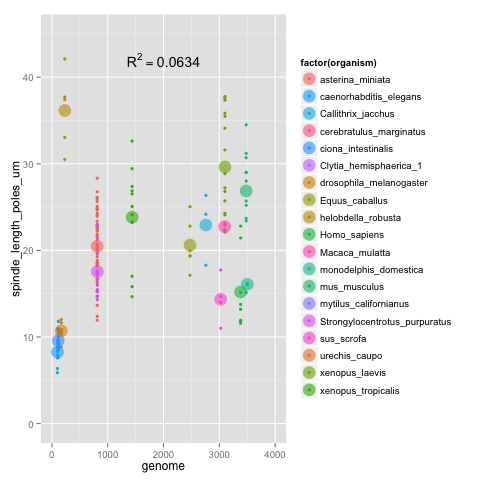

In [66]:
%%R
S3D_means<-create_means_DF(meiotic_for_plot,c("spindle_length_poles_um",'genome'))

plot_S3D<-ggplot()
plot_S3D<-plot_S3D+geom_point(data=meiotic_for_plot,aes(x=genome,y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_S3D
plot_S3D<-plot_S3D+ylim(c(0,45))+xlim(c(0,4000))
plot_S3D
plot_S3D<-plot_S3D+geom_point(data=S3D_means,aes(x=genome,y=spindle_length_poles_um,colour=factor(row.names(S3D_means))),size=6,alpha=0.6)
plot_S3D<-plot_S3D+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_S3D
plot_S3D<-plot_S3D+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(S3D_means$spindle_length_poles_um~S3D_means$genome))$r.squared,3))),x=2000,y=42,parse=TRUE)
plot_S3D



###VII. Meiotic spindle size vs chromosome number

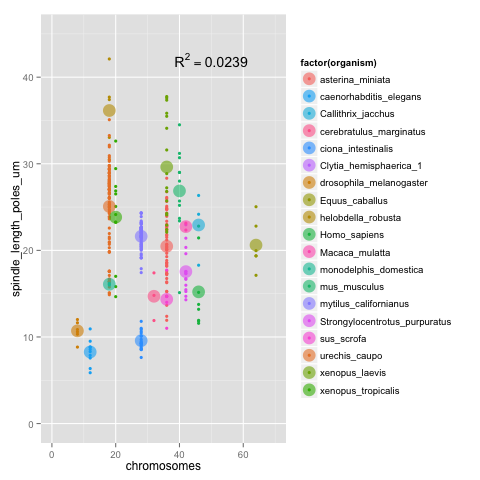

In [69]:
%%R
S3E_means<-cbind(by(meiotic_for_plot$spindle_length_poles_um, meiotic_for_plot$organism,mean,na.rm=TRUE),by(meiotic_for_plot$chromosomes, meiotic_for_plot$organism,mean,na.rm=TRUE))
S3E_means<-data.frame(S3E_means)
names(S3E_means)<-c("spindle_length_poles_um","chromosomes")

plot_S3E<-ggplot()
plot_S3E<-plot_S3E+geom_point(data=meiotic_for_plot,aes(x=chromosomes,y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_S3E
plot_S3E<-plot_S3E+ylim(c(0,45))+xlim(c(0,70))
plot_S3E
plot_S3E<-plot_S3E+geom_point(data=S3E_means,aes(x=chromosomes,y=spindle_length_poles_um,colour=factor(row.names(S3E_means))),size=6,alpha=0.6)
plot_S3E<-plot_S3E+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_S3E
plot_S3E<-plot_S3E+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(S3E_means$spindle_length_poles_um~S3E_means$chromosomes))$r.squared,3))),x=50,y=42,parse=TRUE)
plot_S3E

###VII. Meiotic spindle size vs genome over chromosome number

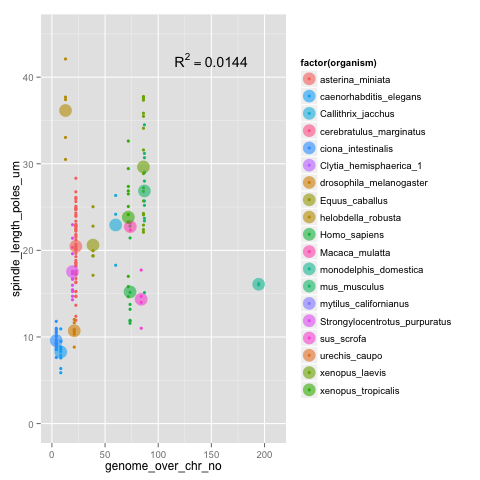

In [70]:
%%R
meiotic_for_plot$genome_over_chr_no=meiotic_for_plot$genome/meiotic_for_plot$chromosomes

S3F_means<-cbind(by(meiotic_for_plot$spindle_length_poles_um, meiotic_for_plot$organism,mean,na.rm=TRUE),by(meiotic_for_plot$chromosomes, meiotic_for_plot$organism,mean,na.rm=TRUE),by(meiotic_for_plot$genome, meiotic_for_plot$organism,mean,na.rm=TRUE),by(meiotic_for_plot$genome_over_chr_no,meiotic_for_plot$organism,mean,na.rm=TRUE))
S3F_means<-data.frame(S3F_means)
names(S3F_means)<-c("spindle_length_poles_um","chromosomes",'genome','genome_over_chr_no')

plot_S3F<-ggplot()
plot_S3F<-plot_S3F+geom_point(data=meiotic_for_plot,aes(x=genome_over_chr_no,y=spindle_length_poles_um,colour=factor(organism)),size=1.5)
plot_S3F
plot_S3F<-plot_S3F+ylim(c(0,45))+xlim(c(0,210))
plot_S3F
plot_S3F<-plot_S3F+geom_point(data=S3F_means,aes(x=genome_over_chr_no,y=spindle_length_poles_um,colour=factor(row.names(S3F_means))),size=6,alpha=0.6)
plot_S3F<-plot_S3F+scale_color_manual(values = mapping_vector2)#,labels=names(mapping_vector2))
plot_S3F
plot_S3F<-plot_S3F+annotate('text',label=paste("R^2==",(signif(summary.lm(lm(S3F_means$spindle_length_poles_um~S3F_means$genome_over_chr_no))$r.squared,3))),x=150,y=42,parse=TRUE)
plot_S3F